In [1]:
%load_ext autoreload
%autoreload 2

import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

sns.set_style('whitegrid')

In [78]:
a, m = 1, 5
thetas = np.random.gamma(shape=a+1, scale=1/(a*m), size=10000)
xs = np.random.exponential(scale=1/thetas)

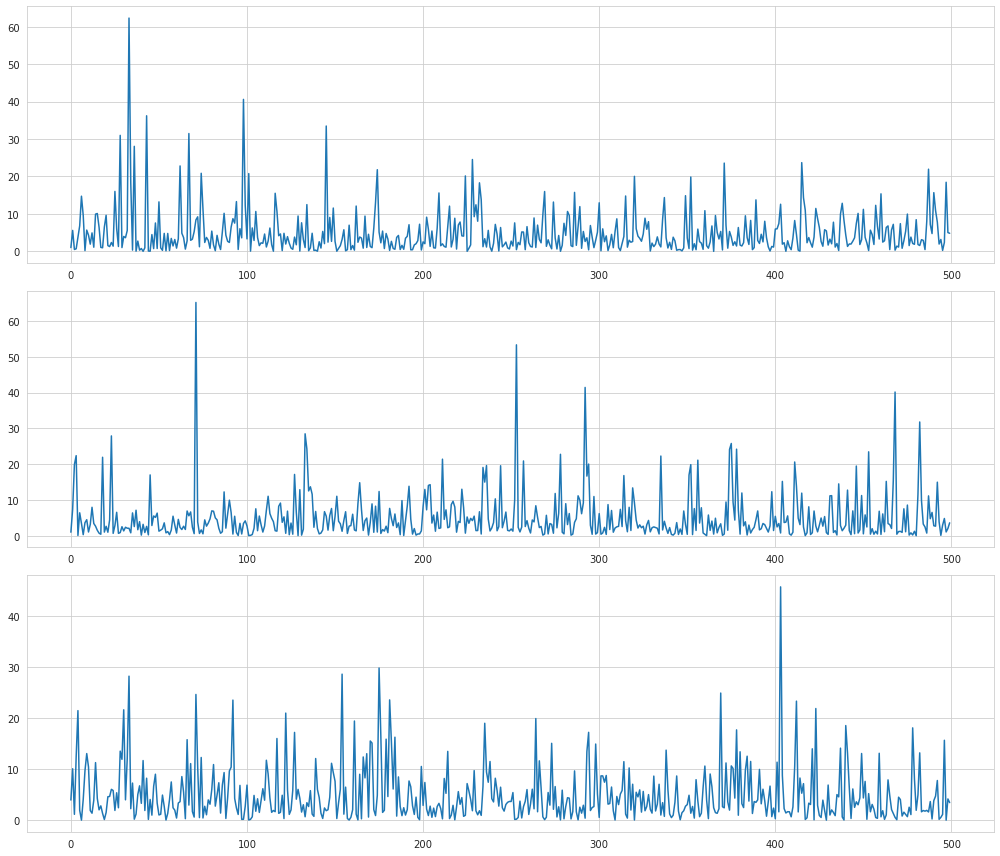

In [69]:
fig, ax = plt.subplots(nrows=3, figsize=(14, 12))

# the composit sampled Lomax process
pd.Series(xs).plot(ax=ax[0])

# plotting the stationary distribution directly
pd.Series(np.random.pareto(a+1, size=500) * a*m).plot(ax=ax[1])

# stationary exponential using the lomax mean for comparison
pd.Series(np.random.exponential(m, size=500)).plot(ax=ax[2])

fig.tight_layout()
fig.show()

In [86]:
# Gibbs sampled Lomax
a, m = 1, 5
x = 500
xs = []
for i in range(10000):
    theta = np.random.gamma(shape=a+2, scale=1/(a*m+x))
    x = np.random.exponential(1/theta)
    xs.append(x)

xs = pd.Series(xs)

<AxesSubplot: >

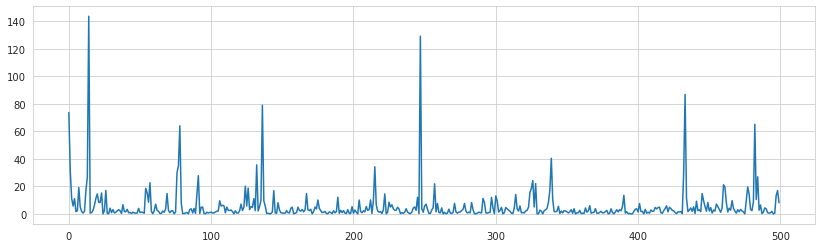

In [56]:
xs.iloc[:500].plot(figsize=(14, 4))

Theortical Cor: 0.5


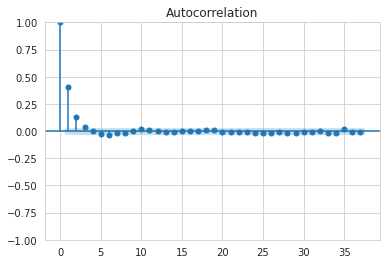

In [66]:
_ = sm.graphics.tsa.plot_acf(xs)
print("Theortical Cor:", 1/(a+1))